<a href="https://colab.research.google.com/github/NickSneo/Innovaccer_ML/blob/master/INNOVACCER_full_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from imblearn.over_sampling import SMOTE 

In [0]:
import warnings
warnings.filterwarnings('ignore')

In [101]:
dataurl = '/content/drive/My Drive/innovacer/ml/BreastCancer_Prognostic_v1.xlsx'
df=pd.read_excel(dataurl)
df.head()

,ID,Outcome,Time,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_std_dev,texture_std_dev,perimeter_std_dev,area_std_dev,smoothness_std_dev,compactness_std_dev,concavity_std_dev,concave_points_std_dev,symmetry_std_dev,fractal_dimension_std_dev,Worst_radius,Worst_texture,Worst_perimeter,Worst_area,Worst_smoothness,Worst_compactness,Worst_concavity,Worst_concave_points,Worst_symmetry,Worst_fractal_dimension,Tumor_Size,Lymph_Node_Status
0,119513,N,31,18.02,27.60,117.50,1013.0,0.09489,0.1036,0.1086,0.07055,0.1865,0.06333,0.6249,1.8900,3.972,71.55,0.004433,0.01421,0.03233,0.009854,0.01694,0.003495,21.63,37.08,139.70,1436.0,0.1195,0.1926,0.3140,0.1170,0.2677,0.08113,5.0,5
1,8423,N,61,17.99,10.38,122.80,1001.0,0.11840,0.2776,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.015870,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,3.0,2
2,842517,N,116,21.37,17.44,137.50,1373.0,0.08836,0.1189,0.1255,0.08180,0.2333,0.06010,0.5854,0.6105,3.928,82.15,0.006167,0.03449,0.03300,0.018050,0.03094,0.005039,24.90,20.98,159.10,1949.0,0.1188,0.3449,0.3414,0.2032,0.4334,0.09067,2.5,0
3,843483,N,123,11.42,20.38,77.58,386.1,0.14250,0.2839,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.018670,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,2.0,0
4,843584,R,27,20.29,14.34,135.10,1297.0,0.10030,0.1328,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.018850,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.5,0


In [102]:
df.shape

(198, 35)

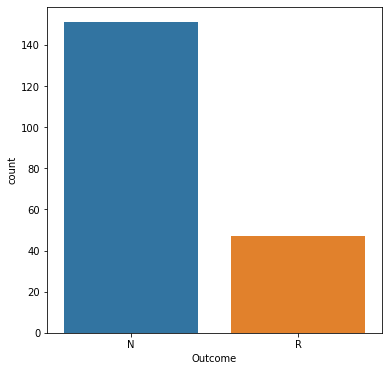

In [103]:
sns.countplot(df['Outcome'],label="Sum")
plt.show()

In [0]:
y=df["Outcome"]
t=df["Time"]
ids=df["ID"]
X = df.drop(["ID", "Outcome","Time"], axis=1)

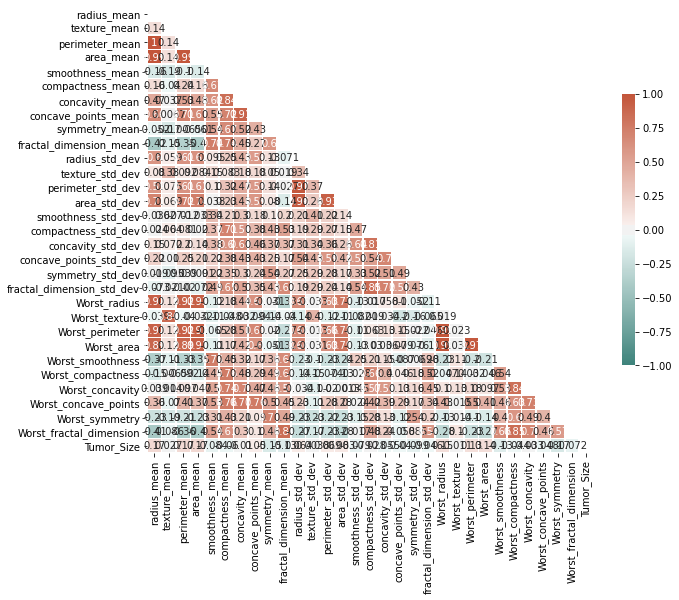

In [105]:
# correlation
correlation = X.corr()
mask = np.zeros_like(correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(10, 10))
cmap = sns.diverging_palette(180, 20, as_cmap=True)
sns.heatmap(correlation, mask=mask, cmap=cmap, vmax=1, vmin =-1, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show()

In [0]:
X = X.drop(["perimeter_mean", "area_mean", "Worst_radius", "Worst_area","Worst_perimeter","perimeter_std_dev","area_std_dev","Worst_texture"], axis=1)

In [0]:
x=X["Lymph_Node_Status"].to_list()
x=pd.to_numeric(x, errors='coerce')
X["Lymph_Status"] = pd.DataFrame(x) 
X = X.drop(["Lymph_Node_Status"],axis=1)

In [0]:
X["Lymph_Status"].fillna(0, inplace = True) 

In [109]:
from sklearn.preprocessing import MinMaxScaler
# scalinng the data

names = X.columns[0:24]
scaler = MinMaxScaler() 
X_sc = scaler.fit_transform(X.iloc[:,0:24]) 
X_sc = pd.DataFrame(X_sc, columns=names)
print(X_sc.shape)
X_sc.head()

(198, 24)


,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_std_dev,texture_std_dev,smoothness_std_dev,compactness_std_dev,concavity_std_dev,concave_points_std_dev,symmetry_std_dev,fractal_dimension_std_dev,Worst_smoothness,Worst_compactness,Worst_concavity,Worst_concave_points,Worst_symmetry,Worst_fractal_dimension,Tumor_Size,Lymph_Status
0,0.434542,0.595848,0.285673,0.216883,0.210069,0.277738,0.321594,0.277177,0.265260,0.486453,0.062045,0.053595,0.160997,0.137260,0.172441,0.209884,0.267183,0.140351,0.253067,0.336803,0.219200,0.171127,0.479167,0.185185
1,0.432698,0.000000,0.622831,0.872621,0.685467,0.700923,0.641455,0.603094,0.554516,0.172944,0.131118,0.325592,0.322068,0.313702,0.421642,0.445045,0.570687,0.610208,0.600269,0.904711,0.598462,0.418864,0.270833,0.074074
2,0.640443,0.244291,0.192026,0.274543,0.252023,0.339930,0.591801,0.208731,0.240955,0.079086,0.122967,0.211967,0.166039,0.377640,0.438966,0.344461,0.262208,0.291639,0.276976,0.666679,0.545831,0.233701,0.218750,0.000000
3,0.028888,0.346021,0.968450,0.896363,0.539745,0.469291,0.744226,1.000000,0.185700,0.252762,0.226364,0.525040,0.343745,0.395824,0.985151,0.707836,0.909020,0.809574,0.578454,0.874479,1.000000,0.773711,0.166667,0.000000
4,0.574063,0.137024,0.363258,0.326927,0.432004,0.464315,0.289261,0.181818,0.346665,0.133465,0.309981,0.134811,0.345778,0.401103,0.184245,0.351085,0.394413,0.152669,0.328109,0.510926,0.157500,0.142595,0.322917,0.000000


In [110]:
l = LabelEncoder()
y = l.fit_transform(y)
y.shape

(198,)

In [0]:
X_train, X_test, y_train, y_test,ids1_train, ids1_test = train_test_split(X_sc, y, ids,test_size=0.10,random_state = 2)

In [124]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0))) 
  
 

sm = SMOTE() 
X_train, y_train = sm.fit_sample(X_train, y_train.ravel()) 
  
print('After OverSampling, the shape of dataset_X: {}'.format(X_train.shape)) 
print('After OverSampling, the shape of dataset_y: {} \n'.format(y_train.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train == 0)))

Before OverSampling, counts of label '1': 44
Before OverSampling, counts of label '0': 134 

After OverSampling, the shape of dataset_X: (268, 24)
After OverSampling, the shape of dataset_y: (268,) 

After OverSampling, counts of label '1': 134
After OverSampling, counts of label '0': 134


In [0]:
# Neural Network applied and its analysis

In [0]:
from keras import Sequential
from keras.layers import Dense,Dropout

classifier = Sequential()
#First Input Layer
classifier.add(Dense(15, init= 'uniform' ,activation='relu', input_dim=24))
#dropout
classifier.add(Dropout(p=0.1))
#Second  Hidden Layer
classifier.add(Dense(15, init= 'uniform', activation='relu'))
#dropout
classifier.add(Dropout(p=0.1))
#Output Layer
classifier.add(Dense(1, init= 'uniform', activation='sigmoid'))

In [0]:
#Compiling the neural network
classifier.compile(optimizer ='rmsprop',loss='binary_crossentropy', metrics =['accuracy'])

In [127]:
classifier.fit(X_train,y_train, batch_size=10, epochs=400)

Epoch 1/400
268/268 [==============================] - 0s 593us/step - loss: 0.6933 - accuracy: 0.5037
Epoch 2/400
268/268 [==============================] - 0s 140us/step - loss: 0.6932 - accuracy: 0.4925
Epoch 3/400
268/268 [==============================] - 0s 149us/step - loss: 0.6932 - accuracy: 0.5000
Epoch 4/400
268/268 [==============================] - 0s 137us/step - loss: 0.6930 - accuracy: 0.5000
Epoch 5/400
268/268 [==============================] - 0s 136us/step - loss: 0.6930 - accuracy: 0.5261
Epoch 6/400
268/268 [==============================] - 0s 133us/step - loss: 0.6926 - accuracy: 0.5373
Epoch 7/400
268/268 [==============================] - 0s 134us/step - loss: 0.6925 - accuracy: 0.5149
Epoch 8/400
268/268 [==============================] - 0s 139us/step - loss: 0.6921 - accuracy: 0.5224
Epoch 9/400
268/268 [==============================] - 0s 147us/step - loss: 0.6915 - accuracy: 0.5858
Epoch 10/400
268/268 [==============================] - 0s 135us/step - l

In [0]:
y_pred = classifier.predict(X_test)
y_pred = [ 1 if y>=0.5 else 0 for y in y_pred ]
# predict probabilities for test set
yhat_probs = classifier.predict(X_test, verbose=0)
# predict crisp classes for test set
yhat_classes = classifier.predict_classes(X_test, verbose=0)

yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]

In [0]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [130]:
eval_model=classifier.evaluate(X_test, y_test)
eval_model
print("Our accuracy is {}%".format((eval_model[1])*100))

# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes)
print('F1 score: %f' % f1)

20/20 [==============================] - 0s 2ms/step
Our accuracy is 75.0%
Precision: 0.333333
Recall: 0.666667
F1 score: 0.444444


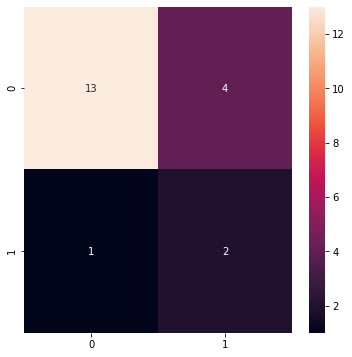

In [131]:
sns.heatmap(cm,annot=True)

In [135]:
out_pred = []
for i in y_pred:
  if i==1:
    out_pred.append('R')
  else:
   out_pred.append('N')   
out = list(zip(ids1_test, out_pred))
print(out)

[(889719, 'R'), (854268, 'N'), (935878, 'N'), (917627, 'R'), (9411286, 'N'), (877500, 'N'), (845636, 'N'), (864729, 'R'), (8911163, 'N'), (856106, 'N'), (846381, 'N'), (8810987, 'N'), (847990, 'N'), (89539, 'R'), (926954, 'N'), (842517, 'N'), (859283, 'R'), (843483, 'N'), (889950, 'R'), (848406, 'N')]


In [136]:
df = pd.DataFrame(out, columns = ["ID", "Outcome"])
df.head()

,ID,Outcome
0,889719,R
1,854268,N
2,935878,N
3,917627,R
4,9411286,N


In [0]:
df.to_excel("/content/drive/My Drive/innovacer/ml/Output_Classification.xlsx", index = False)

In [0]:
#REgression

In [139]:
dataurl = '/content/drive/My Drive/innovacer/ml/BreastCancer_Prognostic_v1.xlsx'
df=pd.read_excel(dataurl)
df.head()

,ID,Outcome,Time,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_std_dev,texture_std_dev,perimeter_std_dev,area_std_dev,smoothness_std_dev,compactness_std_dev,concavity_std_dev,concave_points_std_dev,symmetry_std_dev,fractal_dimension_std_dev,Worst_radius,Worst_texture,Worst_perimeter,Worst_area,Worst_smoothness,Worst_compactness,Worst_concavity,Worst_concave_points,Worst_symmetry,Worst_fractal_dimension,Tumor_Size,Lymph_Node_Status
0,119513,N,31,18.02,27.60,117.50,1013.0,0.09489,0.1036,0.1086,0.07055,0.1865,0.06333,0.6249,1.8900,3.972,71.55,0.004433,0.01421,0.03233,0.009854,0.01694,0.003495,21.63,37.08,139.70,1436.0,0.1195,0.1926,0.3140,0.1170,0.2677,0.08113,5.0,5
1,8423,N,61,17.99,10.38,122.80,1001.0,0.11840,0.2776,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.015870,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,3.0,2
2,842517,N,116,21.37,17.44,137.50,1373.0,0.08836,0.1189,0.1255,0.08180,0.2333,0.06010,0.5854,0.6105,3.928,82.15,0.006167,0.03449,0.03300,0.018050,0.03094,0.005039,24.90,20.98,159.10,1949.0,0.1188,0.3449,0.3414,0.2032,0.4334,0.09067,2.5,0
3,843483,N,123,11.42,20.38,77.58,386.1,0.14250,0.2839,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.018670,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,2.0,0
4,843584,R,27,20.29,14.34,135.10,1297.0,0.10030,0.1328,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.018850,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.5,0


In [0]:
X = df.drop(["perimeter_mean", "area_mean", "Worst_radius", "Worst_area","Worst_perimeter","perimeter_std_dev","area_std_dev","Worst_texture"], axis=1)

In [142]:
X.shape

(198, 27)

In [143]:
x=X["Lymph_Node_Status"].to_list()
x=pd.to_numeric(x, errors='coerce')
X["Lymph_Status"] = pd.DataFrame(x) 
X = X.drop(["Lymph_Node_Status"],axis=1)
X["Lymph_Status"].fillna(0, inplace = True) 
X.head()

,ID,Outcome,Time,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_std_dev,texture_std_dev,smoothness_std_dev,compactness_std_dev,concavity_std_dev,concave_points_std_dev,symmetry_std_dev,fractal_dimension_std_dev,Worst_smoothness,Worst_compactness,Worst_concavity,Worst_concave_points,Worst_symmetry,Worst_fractal_dimension,Tumor_Size,Lymph_Status
0,119513,N,31,18.02,27.60,0.09489,0.1036,0.1086,0.07055,0.1865,0.06333,0.6249,1.8900,0.004433,0.01421,0.03233,0.009854,0.01694,0.003495,0.1195,0.1926,0.3140,0.1170,0.2677,0.08113,5.0,5.0
1,8423,N,61,17.99,10.38,0.11840,0.2776,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,0.006399,0.04904,0.05373,0.015870,0.03003,0.006193,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,3.0,2.0
2,842517,N,116,21.37,17.44,0.08836,0.1189,0.1255,0.08180,0.2333,0.06010,0.5854,0.6105,0.006167,0.03449,0.03300,0.018050,0.03094,0.005039,0.1188,0.3449,0.3414,0.2032,0.4334,0.09067,2.5,0.0
3,843483,N,123,11.42,20.38,0.14250,0.2839,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,0.009110,0.07458,0.05661,0.018670,0.05963,0.009208,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,2.0,0.0
4,843584,R,27,20.29,14.34,0.10030,0.1328,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,0.011490,0.02461,0.05688,0.018850,0.01756,0.005115,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.5,0.0


In [0]:
X= X[df['Outcome'] =="R"]

In [145]:
y=X["Time"]
ids2 = X["ID"]
X=X.drop(["Outcome","Time","ID"],axis=1)
X.head()

,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_std_dev,texture_std_dev,smoothness_std_dev,compactness_std_dev,concavity_std_dev,concave_points_std_dev,symmetry_std_dev,fractal_dimension_std_dev,Worst_smoothness,Worst_compactness,Worst_concavity,Worst_concave_points,Worst_symmetry,Worst_fractal_dimension,Tumor_Size,Lymph_Status
4,20.29,14.34,0.1003,0.1328,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.5,0.0
5,12.75,15.29,0.1189,0.1569,0.16640,0.07666,0.1995,0.07164,0.3877,0.7402,0.007775,0.02987,0.04561,0.01357,0.01774,0.005114,0.1706,0.4196,0.5999,0.1709,0.3485,0.11790,2.5,0.0
7,13.71,20.83,0.1189,0.1645,0.09366,0.05985,0.2196,0.07451,0.5835,1.3770,0.008805,0.03029,0.02488,0.01448,0.01486,0.005412,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,4.0,10.0
13,14.54,27.54,0.1139,0.1595,0.16390,0.07364,0.2303,0.07077,0.3700,1.0330,0.005607,0.04240,0.04741,0.01090,0.01857,0.005466,0.1678,0.6577,0.7026,0.1712,0.4218,0.13410,6.0,6.0
15,16.13,20.68,0.1170,0.2022,0.17220,0.10280,0.2164,0.07356,0.5692,1.0730,0.007026,0.02501,0.03188,0.01297,0.01689,0.004142,0.1789,0.4233,0.4784,0.2073,0.3706,0.11420,3.0,1.0


In [0]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor)

In [147]:
from sklearn.preprocessing import MinMaxScaler
# scalinng the data

names = X.columns[0:24]
scaler = MinMaxScaler() 
X_sc = scaler.fit_transform(X.iloc[:,0:24]) 
X_sc = pd.DataFrame(X_sc, columns=names)

X_sc.head()

,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_std_dev,texture_std_dev,smoothness_std_dev,compactness_std_dev,concavity_std_dev,concave_points_std_dev,symmetry_std_dev,fractal_dimension_std_dev,Worst_smoothness,Worst_compactness,Worst_concavity,Worst_concave_points,Worst_symmetry,Worst_fractal_dimension,Tumor_Size,Lymph_Status
0,0.534274,0.000000,0.460971,0.387864,0.511732,0.449228,0.413090,0.353669,0.355420,0.164528,0.948245,0.175617,0.503079,0.605367,0.178589,0.404896,0.425301,0.135854,0.343603,0.280076,0.027424,0.216833,0.322917,0.000000
1,0.027554,0.057057,0.933893,0.530400,0.400570,0.274247,0.612661,0.881698,0.110588,0.148397,0.479298,0.232680,0.364286,0.328652,0.182722,0.404783,0.825301,0.479654,0.735871,0.333546,0.460409,0.778658,0.218750,0.000000
2,0.092070,0.389790,0.933893,0.575349,0.144686,0.167827,0.828326,1.000000,0.240326,0.398328,0.609316,0.237237,0.108990,0.376343,0.116587,0.438403,0.762651,0.397309,0.084184,0.236155,0.348783,0.740402,0.375000,0.370370
3,0.147849,0.792793,0.806763,0.545777,0.391775,0.255128,0.943133,0.845837,0.098860,0.263315,0.205630,0.368613,0.386453,0.188722,0.201782,0.444495,0.791566,0.861102,0.937402,0.335455,0.743530,1.000000,0.583333,0.222222
4,0.254704,0.380781,0.885584,0.798320,0.420973,0.439732,0.793991,0.960841,0.230851,0.279014,0.384751,0.179956,0.195197,0.297207,0.163203,0.295126,0.925301,0.485582,0.497449,0.565245,0.545771,0.728105,0.270833,0.037037


In [0]:
X_train, X_test, y_train, y_test,ids1_train, ids1_test = train_test_split(X_sc, y, ids2,test_size=0.35,random_state = 2)

In [0]:
FEATURES = ['radius_mean',	'texture_mean'	,'smoothness_mean',	'compactness_mean',	'concavity_mean',	'concave_points_mean',	'symmetry_mean'	,'fractal_dimension_mean',	'radius_std_dev',	'texture_std_dev',	'smoothness_std_dev',	'compactness_std_dev',	'concavity_std_dev',	'concave_points_std_dev',	'symmetry_std_dev',	'fractal_dimension_std_dev',	'Worst_smoothness',	'Worst_compactness',	'Worst_concavity',	'Worst_concave_points',	'Worst_symmetry',	'Worst_fractal_dimension',	'Tumor_Size',	'Lymph_Status']

In [0]:
from sklearn.metrics import mean_squared_error, r2_score

In [0]:
clf =RandomForestRegressor(n_estimators = 1000, criterion = 'mae')
clf=clf.fit(X_train,y_train)

In [0]:
y_pred = clf.predict(X_test)

In [175]:
print("Test RMSE: ", np.sqrt(mean_squared_error(y_test, clf.predict(X_test))))
print("Test R^2: ", r2_score(y_test, clf.predict(X_test)))

Test RMSE:  23.152186541701944
Test R^2:  0.13807205779770293


In [176]:
print(y_pred)
print(y_test)

[21.215  28.143  10.632  24.889  34.469  22.384  27.202  30.521  16.148
 25.41   37.192  13.19   18.479  11.249  30.24   32.445  23.5315]
105    19
46     26
159    11
59     73
143    49
161     7
177     1
48     40
50     10
4      27
7      77
40     11
62      7
128    24
110    12
176    14
125    78
Name: Time, dtype: int64


In [177]:
out = list(zip(ids1_test, y_pred))
print(out)

[(886490, 21.215), (859983, 28.143), (91485, 10.632), (866203, 24.889), (906023, 34.469), (915143, 22.384), (931652, 27.202), (8611792, 30.521), (86208, 16.148), (843584, 25.41), (844582, 37.192), (857637, 13.19), (867739, 18.479), (89812, 11.249), (888570, 30.24), (929684, 32.445), (89539, 23.5315)]


In [178]:
df = pd.DataFrame(out, columns = ["ID", "Time"])
df.head()

,ID,Time
0,886490,21.215
1,859983,28.143
2,91485,10.632
3,866203,24.889
4,906023,34.469


In [0]:
df.to_excel("/content/drive/My Drive/innovacer/ml/Output_Regression.xlsx", index = False)